In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# File path
file_path = r"C:\Users\alpes\OneDrive\Desktop\Delhi's Climate Data Analysis\data\processed\delhi-monthly-rains_no-total.csv"

# Load data
df = pd.read_csv(file_path)

In [6]:
# Preview data
print(df.head())

   Year        Jan        Feb        Mar     April        May       June  \
0  1901  42.618640  14.354608   4.154413  0.000000   0.140009  23.689031   
1  1902   0.000000   0.000000   1.565202  9.031396   7.475481  62.297997   
2  1903  16.144160   0.000000   0.887416  0.000000   2.435693   2.801384   
3  1904   3.252248   0.471934  57.680300  0.000000  30.911919  10.535451   
4  1905  44.464204  15.787177  14.098631  8.051871  11.244591  18.729828   

         July         Aug        Sept       Oct        Nov        Dec  
0  127.842276  186.151910    6.014561  0.000000   0.000000   3.105190  
1  174.241317  189.517138   62.154716  3.861902   0.000000   0.000000  
2   96.606913  116.908205   20.842896  8.091753   0.000000   0.000000  
3  110.025595  132.376678  178.318272  0.000000  10.930715  20.285294  
4   77.044289   39.871967   99.516125  0.000000   0.000000   0.364023  


In [7]:
# Check for missing values
print(df.isnull().sum())

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
dtype: int64


In [8]:
# Basic descriptive statistics
print(df.describe())

              Year         Jan         Feb         Mar       April  \
count   121.000000  121.000000  121.000000  121.000000  121.000000   
mean   1961.000000   18.247693   17.072332   13.702348    8.296139   
std      35.073732   20.125544   21.653575   19.527958   17.196827   
min    1901.000000    0.000000    0.000000    0.000000    0.000000   
25%    1931.000000    1.401108    0.471934    0.196458    0.000000   
50%    1961.000000   12.757024    8.547797    5.644869    1.938163   
75%    1991.000000   26.296953   26.107169   18.926317    8.636471   
max    2021.000000  116.676177  122.968840   99.725051  125.326873   

              May        June        July         Aug        Sept         Oct  \
count  121.000000  121.000000  121.000000  121.000000  121.000000  121.000000   
mean    14.751497   52.778966  189.302466  191.904133  116.409897   18.561726   
std     18.550058   56.703201  107.729624  119.975638   95.820208   42.556381   
min      0.000000    0.137574    9.170422   1

In [ ]:
# in wide format (Month columns), melt to long format
if 'Year' in df.columns and 'Jan' in df.columns:
    df_long = df.melt(id_vars='Year', var_name='Month', value_name='Rainfall')
else:
    df_long = df.copy()

# Drop NaNs
df_long.dropna(inplace=True)

In [13]:
yearly_total = df_long.groupby('Year')['Rainfall'].sum().reset_index(name='Total Rainfall')
print("\n🔹 Yearly Total Rainfall:")
print(yearly_total)


🔹 Yearly Total Rainfall:
     Year  Total Rainfall
0    1901      408.070638
1    1902      510.145148
2    1903      264.718420
3    1904      554.788406
4    1905      329.172706
..    ...             ...
116  2017      441.484187
117  2018      384.208662
118  2019      417.868428
119  2020      527.445443
120  2021      676.118833

[121 rows x 2 columns]


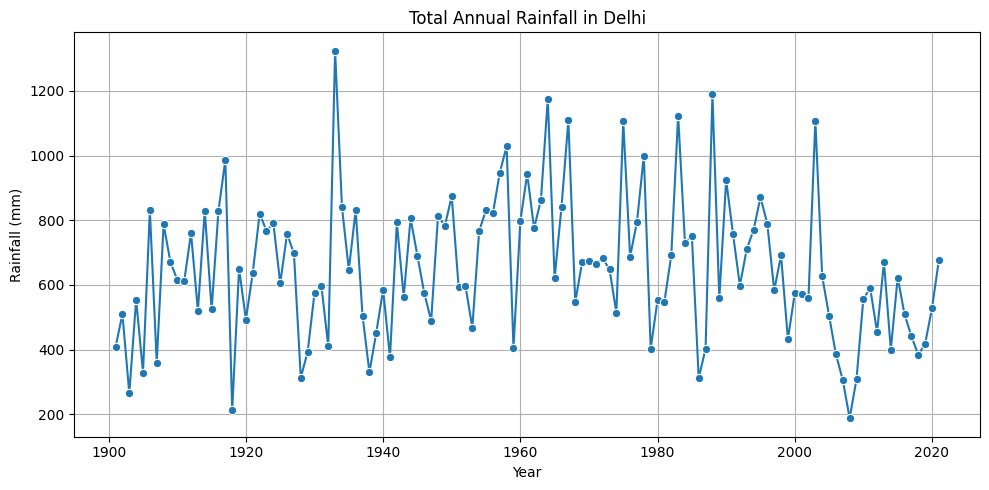

In [14]:
# Plot yearly total rainfall
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_total, x='Year', y='Total Rainfall', marker='o')
plt.title('Total Annual Rainfall in Delhi')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\alpes\AppData\Local\Temp\ipykernel_10108\2651110320.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Rainfall', palette='Blues_d')


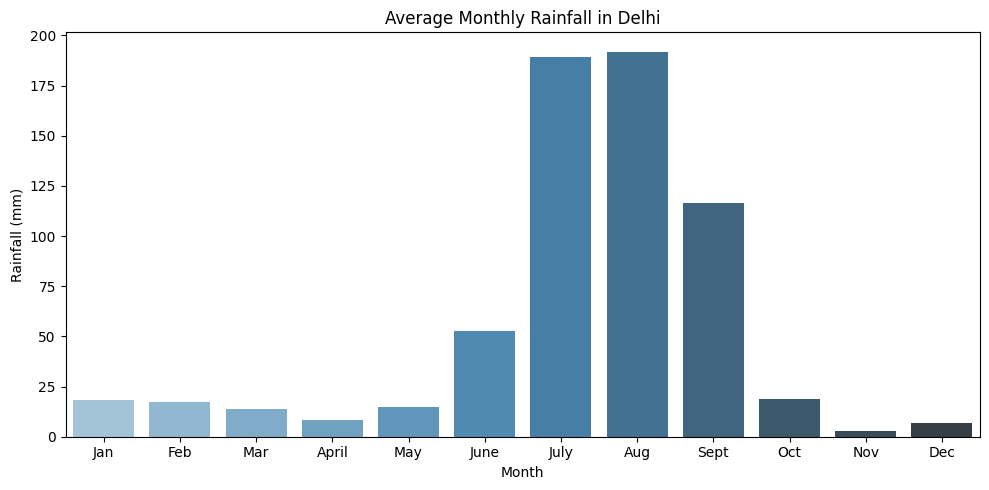

In [ ]:
# Monthly average rainfall across years
monthly_avg = df_long.groupby('Month')['Rainfall'].mean().reset_index()

month_order = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 
               'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] 
monthly_avg['Month'] = pd.Categorical(monthly_avg['Month'], categories=month_order, ordered=True)
monthly_avg.sort_values('Month', inplace=True)

# Plot monthly average
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_avg, x='Month', y='Rainfall', palette='Blues_d')
plt.title('Average Monthly Rainfall in Delhi')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()

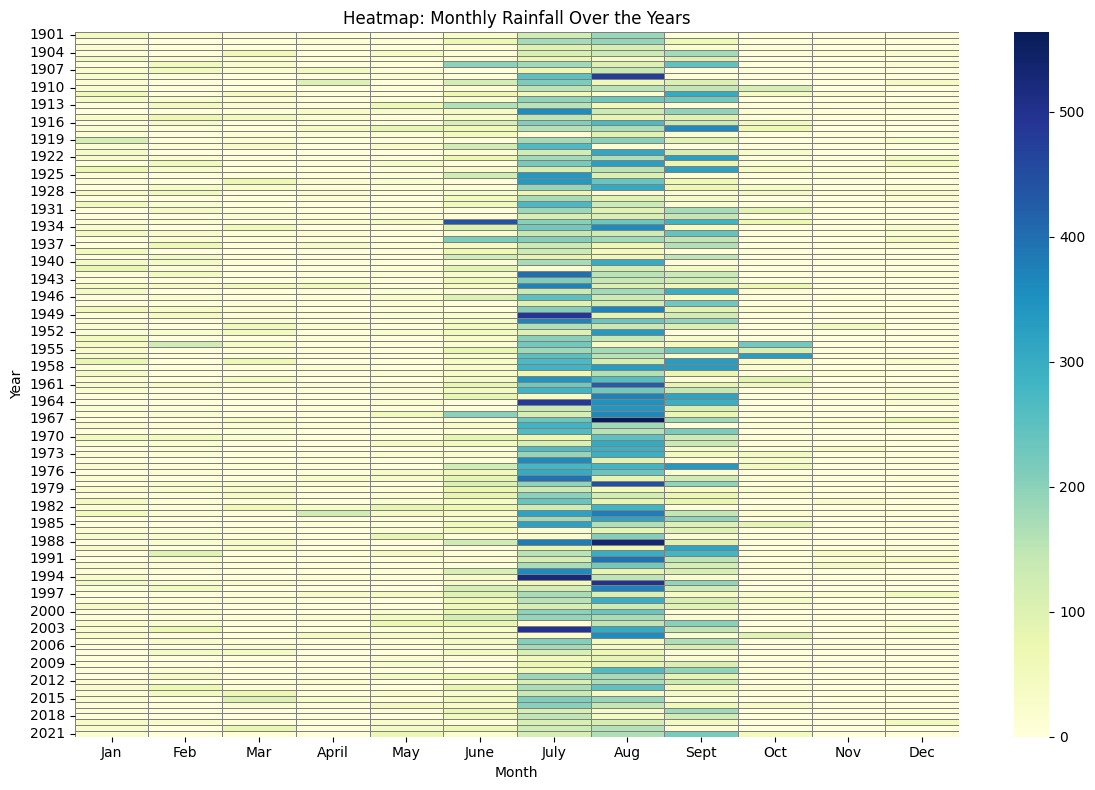

In [ ]:
pivot = df_long.pivot(index='Year', columns='Month', values='Rainfall')
pivot = pivot[month_order]

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Heatmap: Monthly Rainfall Over the Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


C:\Users\alpes\AppData\Local\Temp\ipykernel_10108\664589523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='Month', y='Rainfall', order=month_order, palette="Set3")


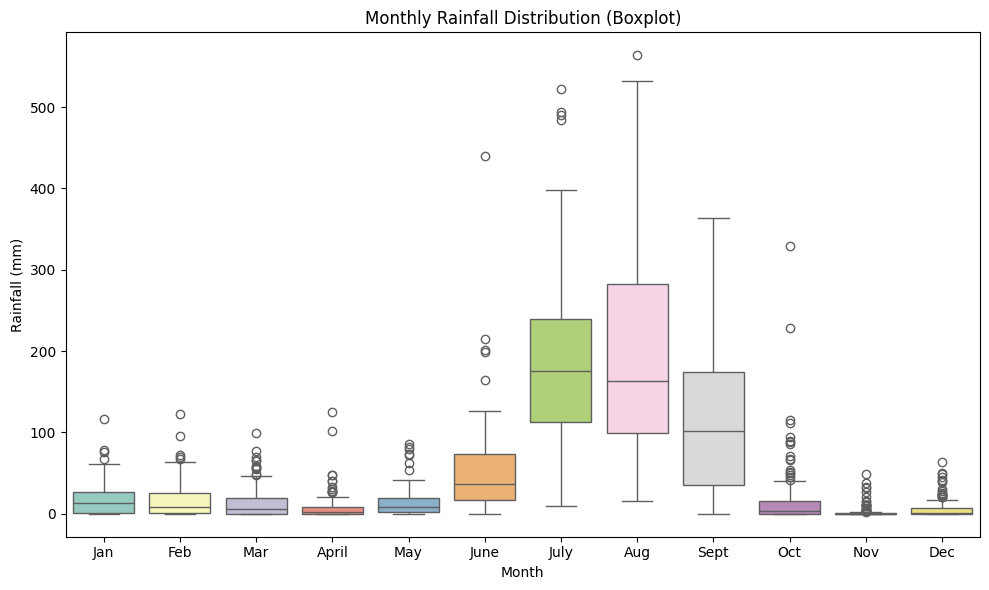

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x='Month', y='Rainfall', order=month_order, palette="Set3")
plt.title("Monthly Rainfall Distribution (Boxplot)")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.tight_layout()
plt.show()


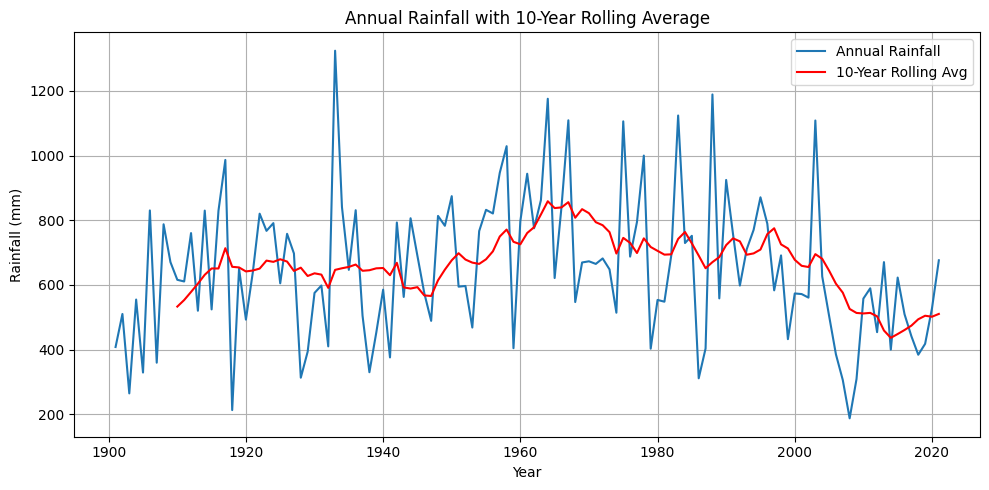

In [18]:
yearly_total['Rolling_10yr'] = yearly_total['Total Rainfall'].rolling(window=10).mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_total, x='Year', y='Total Rainfall', label='Annual Rainfall')
sns.lineplot(data=yearly_total, x='Year', y='Rolling_10yr', label='10-Year Rolling Avg', color='red')
plt.title("Annual Rainfall with 10-Year Rolling Average")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


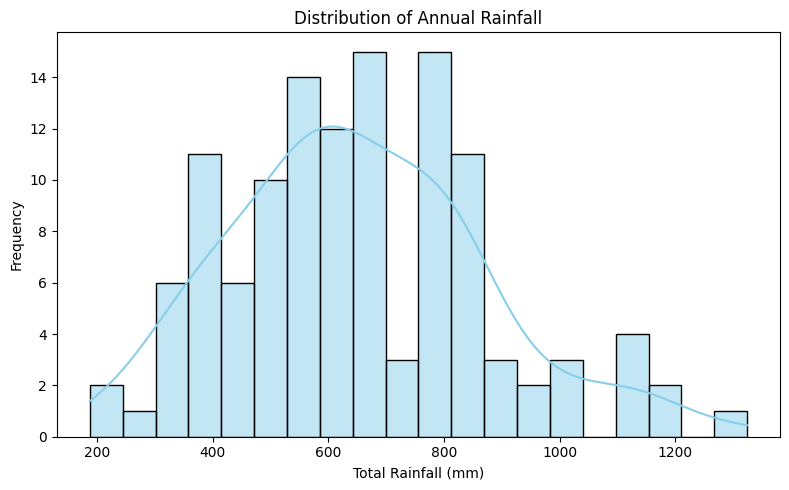

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(yearly_total['Total Rainfall'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Annual Rainfall")
plt.xlabel("Total Rainfall (mm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\alpes\AppData\Local\Temp\ipykernel_10108\2587115757.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_total, x='Year', y='Anomaly', palette='coolwarm')


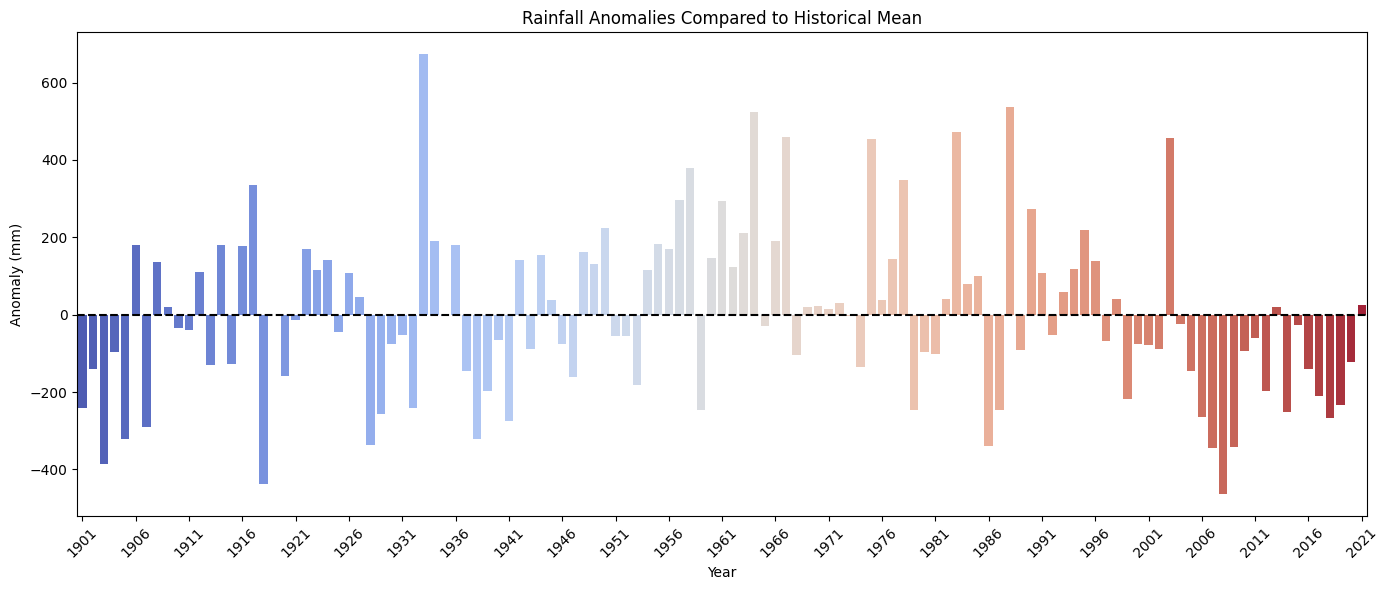

In [21]:
import numpy as np

# Select every 5th year
step = 5
years = yearly_total['Year']
plt.figure(figsize=(14, 6))
sns.barplot(data=yearly_total, x='Year', y='Anomaly', palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title("Rainfall Anomalies Compared to Historical Mean")
plt.xlabel("Year")
plt.ylabel("Anomaly (mm)")

# Apply step-based x-axis ticks
plt.xticks(ticks=np.arange(0, len(years), step), labels=years[::step], rotation=45)
plt.tight_layout()
plt.show()


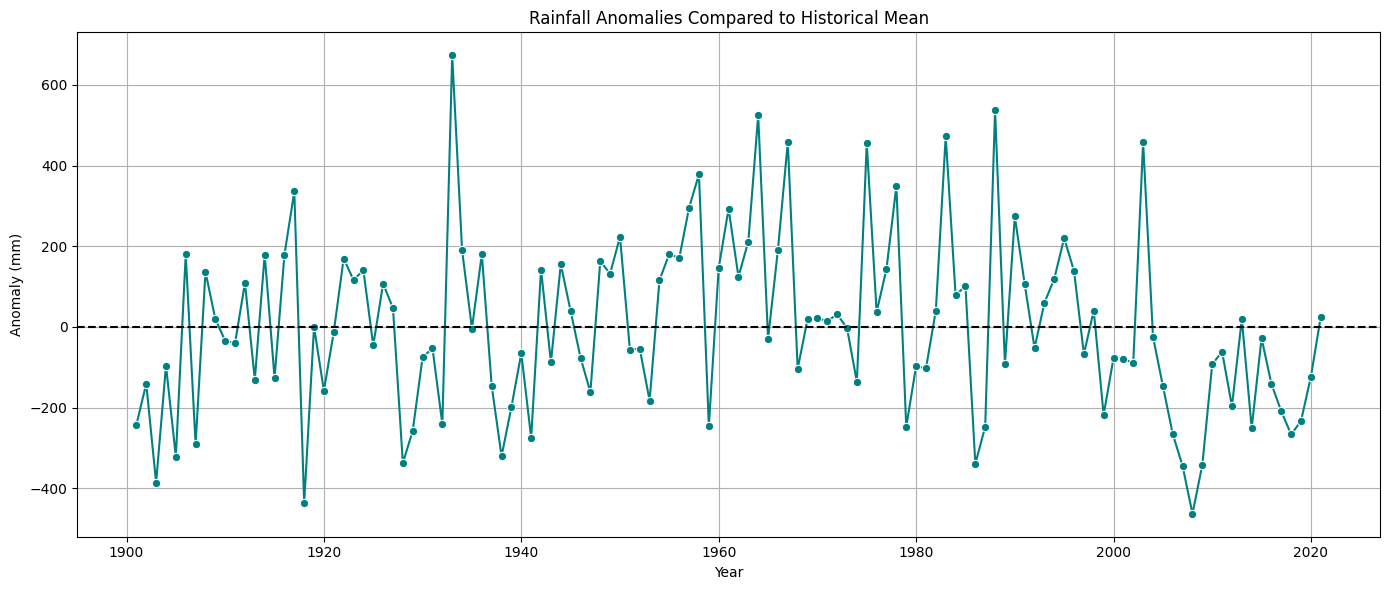

In [22]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_total, x='Year', y='Anomaly', marker='o', color='teal')
plt.axhline(0, color='black', linestyle='--')
plt.title("Rainfall Anomalies Compared to Historical Mean")
plt.xlabel("Year")
plt.ylabel("Anomaly (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


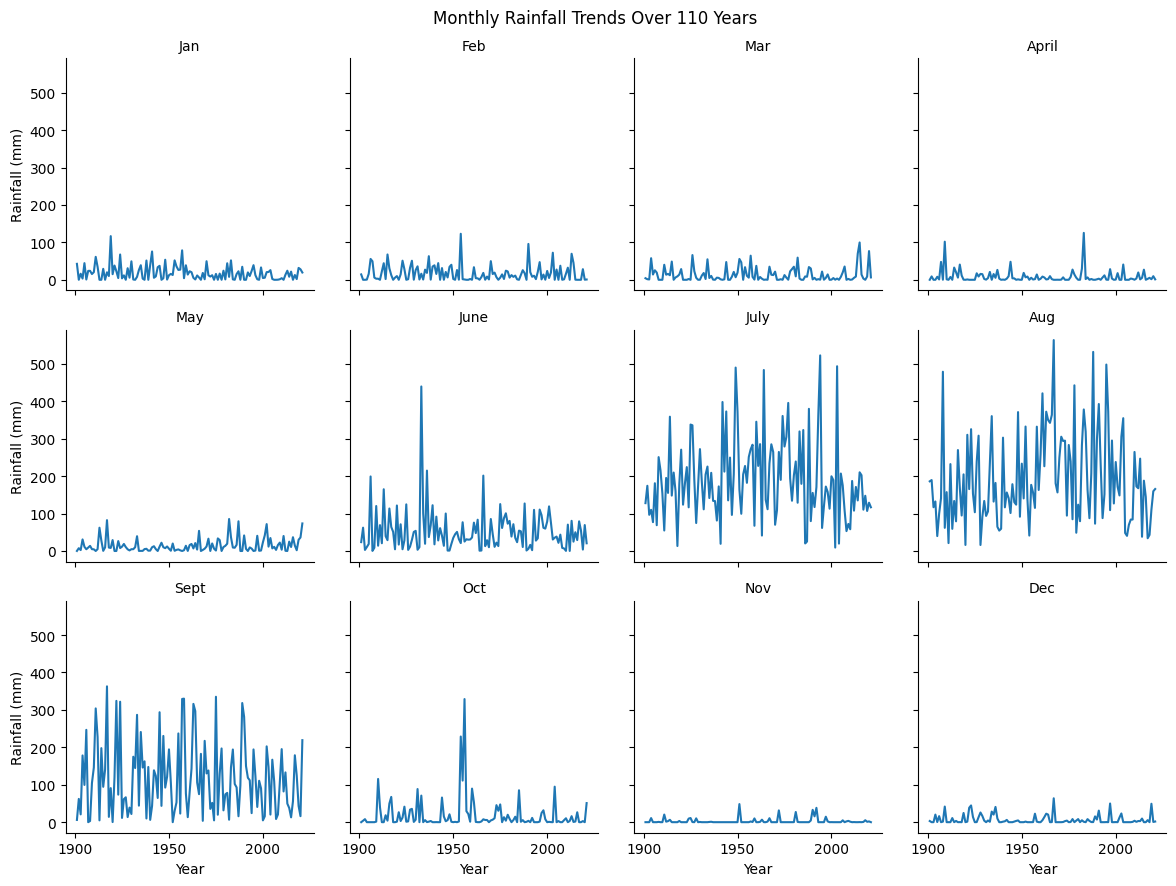

In [23]:
g = sns.FacetGrid(df_long, col="Month", col_wrap=4, col_order=month_order, height=3)
g.map_dataframe(sns.lineplot, x="Year", y="Rainfall")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Rainfall (mm)")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Monthly Rainfall Trends Over 110 Years")
plt.tight_layout()
plt.show()


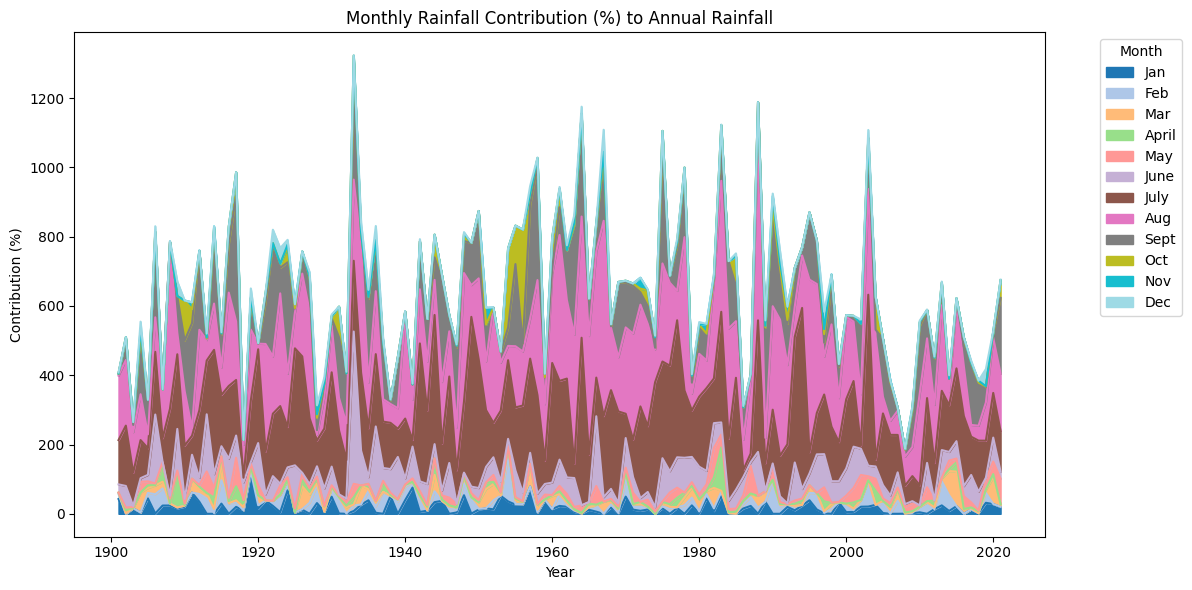

In [24]:
pivot_percent = df_long.pivot(index='Year', columns='Month', values='Rainfall')
pivot_percent = pivot_percent[month_order]
pivot_percent_norm = pivot_percent.div(pivot_percent.sum(axis=1), axis=0) * 100

pivot_percent.plot.area(stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Monthly Rainfall Contribution (%) to Annual Rainfall")
plt.xlabel("Year")
plt.ylabel("Contribution (%)")
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
